In [1]:
# version 1.0
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myClassification.R")
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/mySample.R")


## Classification


In [2]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## Building samples (training and testing)

In [3]:
# preparing dataset for random sampling
set.seed(1)
sr <- sample_random()
sr <- train_test(sr, iris)
iris_train = sr$train
iris_test = sr$test

In [4]:
tbl <- rbind(table(iris$Species), table(iris_train$Species), table(iris_test$Species))
rownames(tbl) <- c("dataset", "training", "test")
head(tbl)


,setosa,versicolor,virginica
dataset,50,50,50
training,39,38,43
test,11,12,7


## General function for testing classification methods

In [5]:
train_test <- function(model, iris_train, iris_test) {
  print(class(model)[1])
  
  loadlibrary("RSNNS")
  
  model <- prepare(model, iris_train)
  train_prediction <- action(model, iris_train)
  
  iris_train_predictand = decodeClassLabels(iris_train[,"Species"])
  train_eval <- classif_evaluation(iris_train_predictand, train_prediction)
  print(train_eval$metrics)
  plot(roc_curve(train_eval))
  
  test_prediction <- action(model, iris_test)
  
  iris_test_predictand = decodeClassLabels(iris_test[,"Species"])
  test_eval <- classif_evaluation(iris_test_predictand, test_prediction)
  print(test_eval$metrics)
  plot(roc_curve(test_eval))
}


## Majority class baseline prediction (Zero Rule)

Model creating and level of adjustment during training

[1] "class_majority"


Loading required package: RSNNS

Warning message:
"package 'RSNNS' was built under R version 3.6.3"
Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 3.6.3"
class_majority,prepare.class_majority,0.000,

Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 3.6.3"
Loading required package: nnet

Warning message:
"package 'nnet' was built under R version 3.6.3"
Loading required package: MLmetrics


Attaching package: 'MLmetrics'


The following object is masked from 'package:base':

    Recall




   accuracy        f1 sensitivity specificity precision    recall
1 0.5722222 0.3583333   0.3583333   0.6791667 0.3583333 0.3583333


Loading required package: ROCR

Warning message:
"package 'ROCR' was built under R version 3.6.3"


   accuracy        f1 sensitivity specificity precision    recall
1 0.4888889 0.2333333   0.2333333   0.6166667 0.2333333 0.2333333


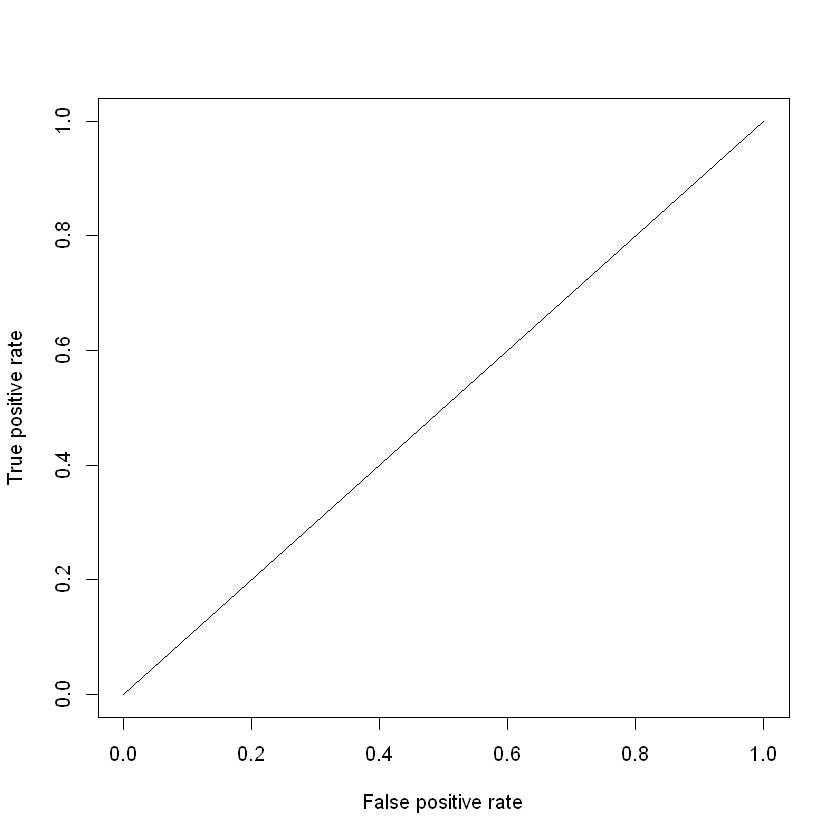

In [6]:
train_test(class_majority("Species"), iris_train, iris_test)

## Decision Tree
Training the model, presenting the level of adjustment, quality of prediction, and confusion matrix.

[1] "class_dtree"


Loading required package: tree

class_dtree,prepare.class_dtree,0.002,



   accuracy    f1 sensitivity specificity precision recall
1 0.9833333 0.975       0.975      0.9875     0.975  0.975
   accuracy        f1 sensitivity specificity precision    recall
1 0.9777778 0.9666667   0.9666667   0.9833333 0.9666667 0.9666667


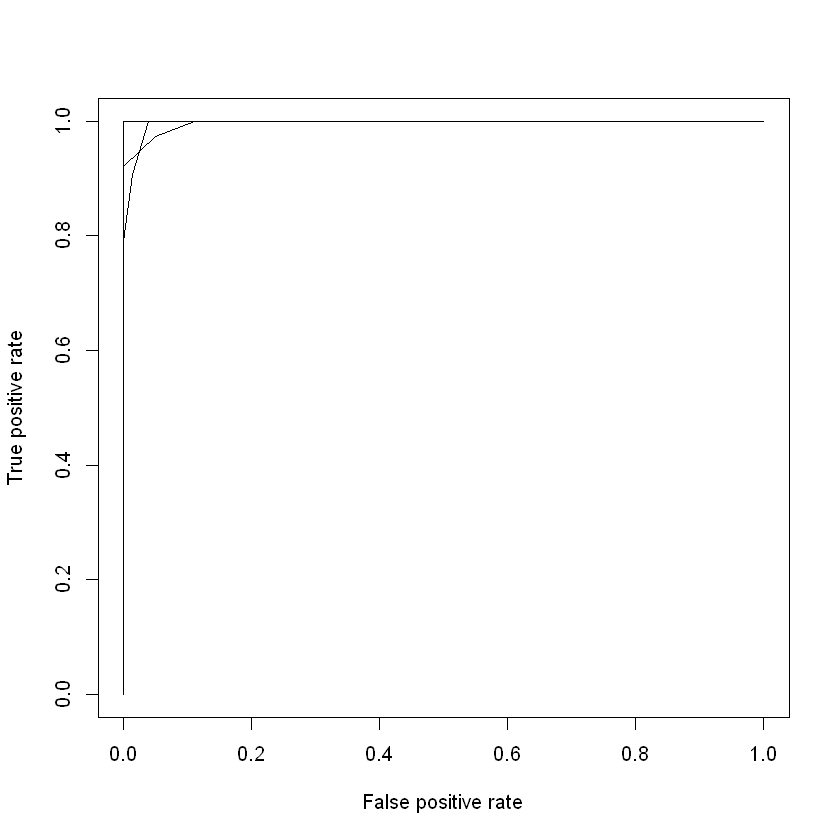

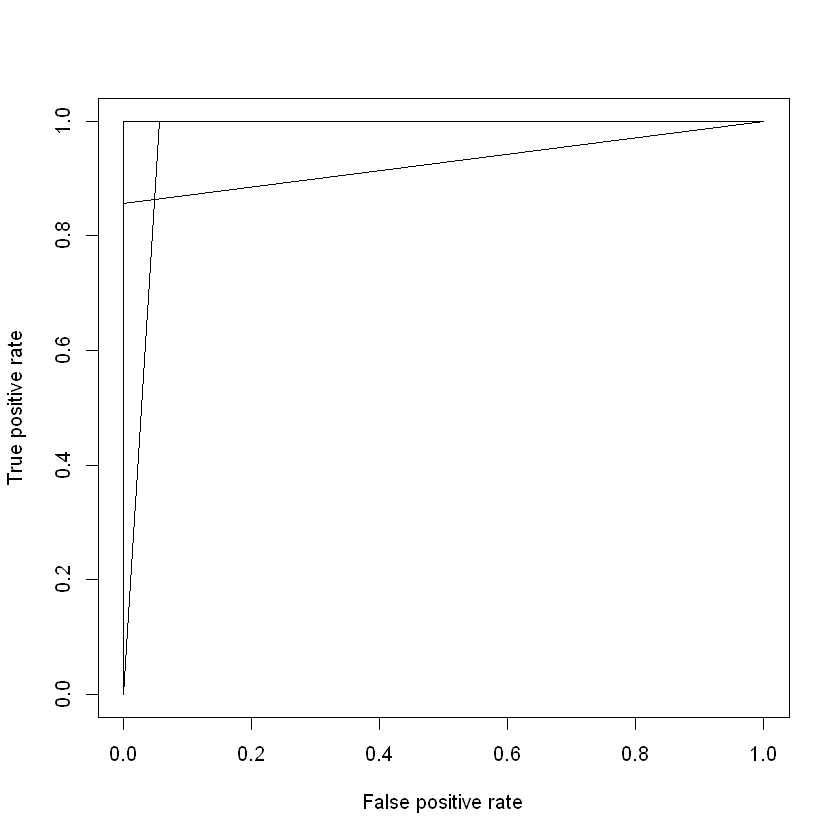

In [7]:
train_test(class_dtree("Species"), iris_train, iris_test)

## Naive Bayes

[1] "class_nb"


Loading required package: e1071

Warning message:
"package 'e1071' was built under R version 3.6.3"
class_nb,prepare.class_nb,0.001,



   accuracy        f1 sensitivity specificity precision    recall
1 0.9722222 0.9583333   0.9583333   0.9791667 0.9583333 0.9583333
   accuracy        f1 sensitivity specificity precision    recall
1 0.9777778 0.9666667   0.9666667   0.9833333 0.9666667 0.9666667


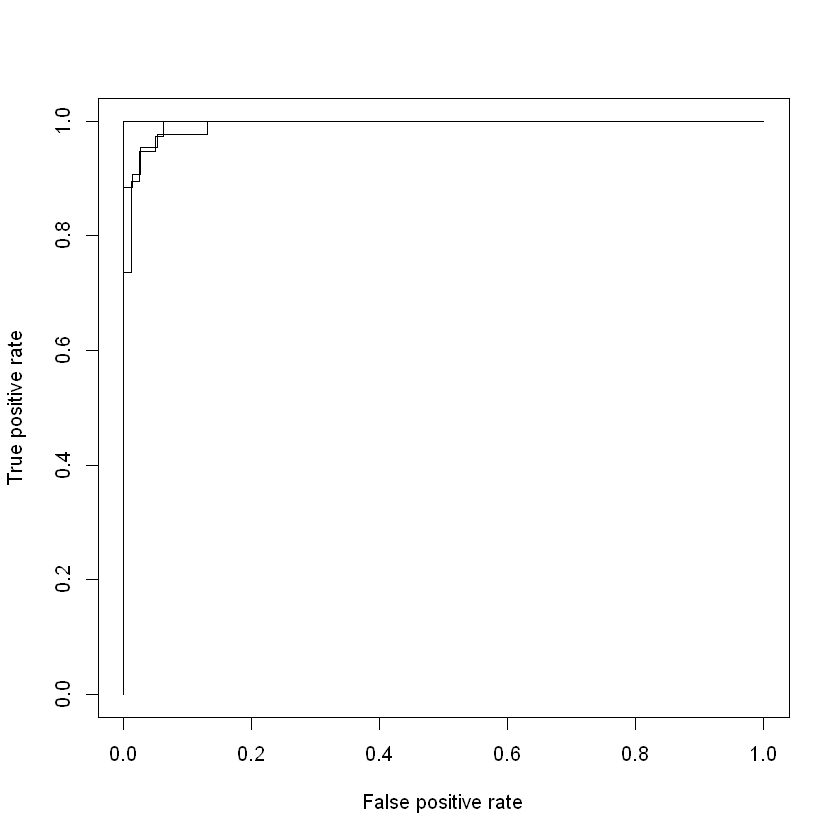

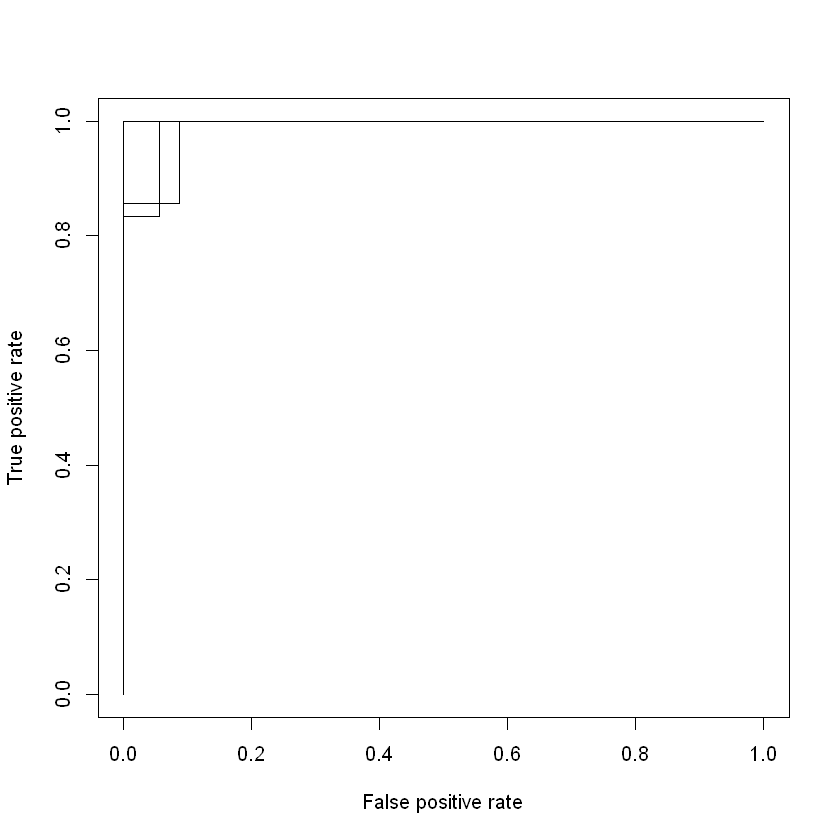

In [8]:
train_test(class_nb("Species"), iris_train, iris_test)

## Random Forest

[1] "class_rf"


Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

class_rf,prepare.class_rf,0.048,mtry=2,ntree=50



  accuracy f1 sensitivity specificity precision recall
1        1  1           1           1         1      1
   accuracy        f1 sensitivity specificity precision    recall
1 0.9777778 0.9666667   0.9666667   0.9833333 0.9666667 0.9666667


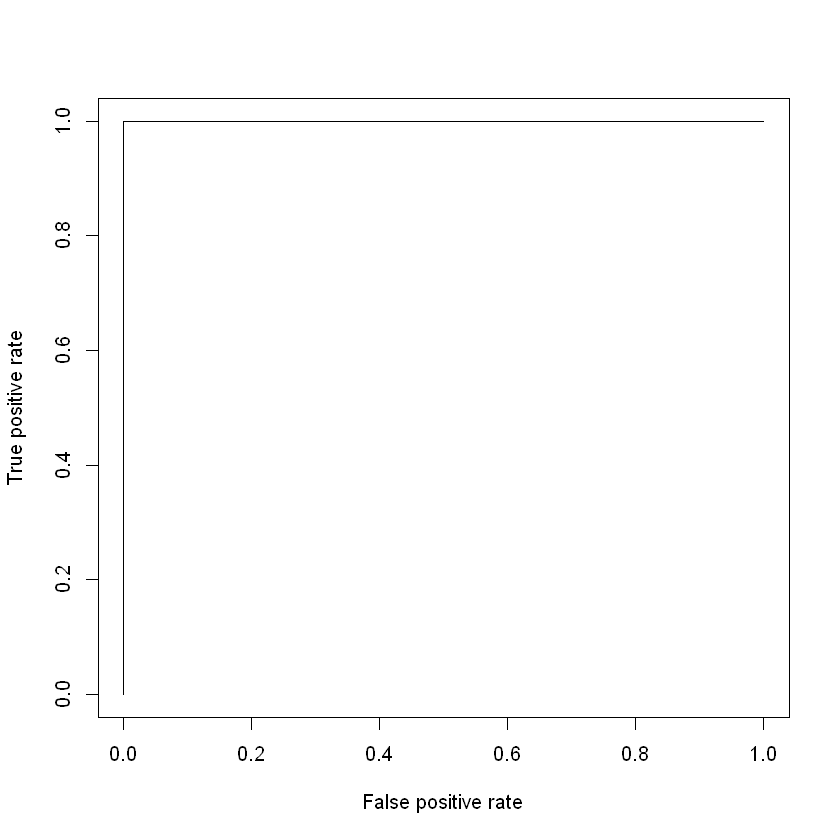

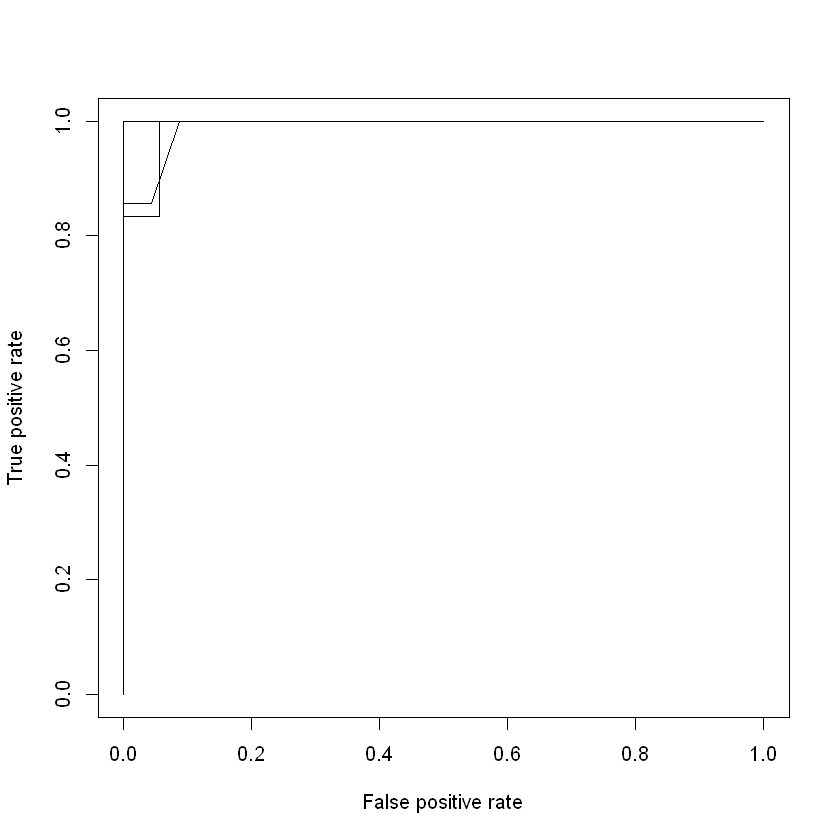

In [9]:
train_test(class_rf("Species"), iris_train, iris_test)

## Neural Networks - MLP using nnet


In [ ]:
train_test(class_mlp("Species"), iris_train, iris_test)

## Creating a SVM with RBF kernel

In [ ]:
train_test(class_svm("Species"), iris_train, iris_test)

## knn prediction

In [ ]:
train_test(class_knn("Species"), iris_train, iris_test)

## Convolutional neural networks (CNN)

In [ ]:
train_test(class_cnn("Species"), iris_train, iris_test)